## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

1. Data Collection
2. Data Anaylsis & Pre-processing 
3. Features Engineering 
4. Hyper-parameters Optimiztion
5. Build The Model 

### Data Collection
_____________________________

In [2]:
# Load the dataset 
email_data = pd.read_csv('spam (1).csv' , encoding='latin')
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
## Number of rows and columns 
email_data.shape

(5572, 5)

In [4]:
## Spliting the data into train and test data to prevent any chance of data leakage 
email_data = email_data.sample(len(email_data) , random_state=1)

## Train Data
test_data = email_data[:1114].reset_index(drop = True)

## Test Data
train_data = email_data[1114:].reset_index(drop = True)


In [5]:
print(f"Shape of Train Data : {train_data.shape}")
print(f"Shape of Test Data : {test_data.shape}")

Shape of Train Data : (4458, 5)
Shape of Test Data : (1114, 5)


### Data Analsis And Pre-processing
_______________________________________________
1. Data Cleaning 
2. Data Anaylsis EDA
3. Text Pre-Processing 

In [6]:
## Checking the type of features 
email_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 1078 to 5157
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 261.2+ KB


In [7]:
## drop unimportant features 
train_data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] ,inplace=True )

test_data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] ,inplace=True )

In [8]:
## rename the columns 
train_data.rename(columns = {'v1' : 'Class' , 'v2' : 'Text'} , inplace= True)

test_data.rename(columns = {'v1' : 'Class' , 'v2' : 'Text'} , inplace= True)

In [9]:
train_data.head()

,Class,Text
0,ham,Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
1,ham,Sleeping nt feeling well
2,ham,Come aftr &lt;DECIMAL&gt; ..now i m cleaning ...
3,ham,"Almost there, see u in a sec"
4,ham,"Yeah, probably earlier than that"


### Encoding 
_________________
1. Spam ----> 1
2. Ham ----> 0

In [10]:
train_data.loc[train_data['Class'] == 'spam' , 'Class'] = 1
train_data.loc[train_data['Class'] == 'ham' , 'Class'] = 0


test_data.loc[test_data['Class'] == 'spam' , 'Class'] = 1
test_data.loc[test_data['Class'] == 'ham' , 'Class'] = 0

In [11]:
## Convert the type of calss feature into int
train_data['Class'] = train_data['Class'].astype(int)

test_data['Class'] = test_data['Class'].astype(int)

#### Missing Values 
_____

In [12]:
## Checking for Missing values 
print(f" Missing values in Train Data \n : {train_data.isnull().sum()}")

print(f" Missing values in Test Data \n : {test_data.isnull().sum()}")

 Missing values in Train Data 
 : Class    0
Text     0
dtype: int64
 Missing values in Test Data 
 : Class    0
Text     0
dtype: int64


#### Duplicated Values 
___________________

In [13]:
## Checking for Duplicated values 
print(f" Duplicated values in Train Data \n : {train_data.duplicated().sum()}")

print(f" Duplicated values in Test Data \n : {test_data.duplicated().sum()}")

 Duplicated values in Train Data 
 : 262
 Duplicated values in Test Data 
 : 26


In [14]:
## Droping Duplicated values 
train_data.drop_duplicates(inplace = True , keep='first')

test_data.drop_duplicates(inplace = True , keep = 'first')

In [15]:
train_data = train_data.reset_index(drop = True)

test_data = test_data.reset_index(drop = True)

## EDA
________

In [16]:
## Checking for Each Class 
train_data['Class'].value_counts()

Class
0    3649
1     547
Name: count, dtype: int64

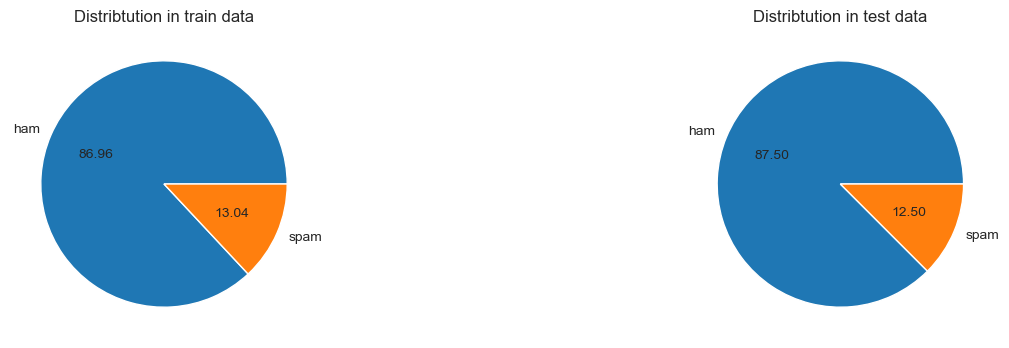

In [17]:
## Distribution of Class Spam and ham
plt.subplots(figsize=(16,4))
plt.subplot(121)
plt.pie(train_data['Class'].value_counts() , labels=['ham','spam'] , autopct='%0.2f')
plt.title('Distribtution in train data')
plt.subplot(122)
plt.pie(test_data['Class'].value_counts() , labels = ['ham','spam'] , autopct='%0.2f')
plt.title('Distribtution in test data')
plt.show()


### Data Is Imbalanced

## Features Engineering
______________

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Kimo
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
## Add New Columns for number of Characters
train_data['Num_Characters'] = train_data['Text'].apply(len)

test_data['Num_Characters'] = test_data['Text'].apply(len)

In [20]:
## Add new Columns For Number Of Words 
train_data['Num_words'] = train_data['Text'].apply(lambda x :len(nltk.word_tokenize(x)))

test_data['Num_words'] = test_data['Text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [21]:
## Add new columns for number of sentens 
train_data['Num_Sent'] = train_data['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

test_data['Num_Sent'] = test_data['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
## Five Point Summary for ham observation 
train_data[train_data['Class'] == 0][['Num_Characters','Num_words','Num_Sent']].describe()

,Num_Characters,Num_words,Num_Sent
count,3649.000000,3649.000000,3649.000000
mean,71.100576,17.247739,1.818032
std,56.791724,13.338110,1.264518
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,196.000000,14.000000


In [23]:
## Five Point Summary for spam observation 
train_data[train_data['Class'] == 1][['Num_Characters','Num_words','Num_Sent']].describe()

,Num_Characters,Num_words,Num_Sent
count,547.000000,547.000000,547.000000
mean,137.146252,27.553931,2.968921
std,30.838950,7.134393,1.508506
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
## ham_data 
## Five Point Summary for ham observation 
ham_data = train_data[train_data['Class'] == 0][['Num_Characters','Num_words','Num_Sent']]

## Five Point Summary for ham observation 
spam_data = train_data[train_data['Class'] == 1][['Num_Characters','Num_words','Num_Sent']]

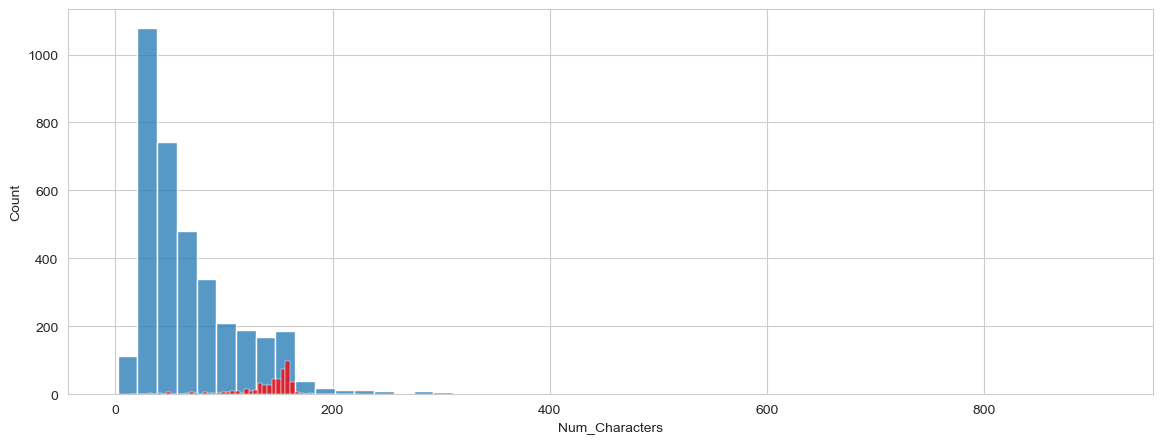

In [25]:
## comparing the ham and spam data regarding num of Characters
plt.subplots(figsize = (14,5))
sns.histplot(ham_data['Num_Characters'],bins = 50)
sns.histplot(spam_data['Num_Characters'] , bins = 50 , color = 'red')
plt.show('Comapring Number Of Characters Spam Vs Ham')

plt.show()


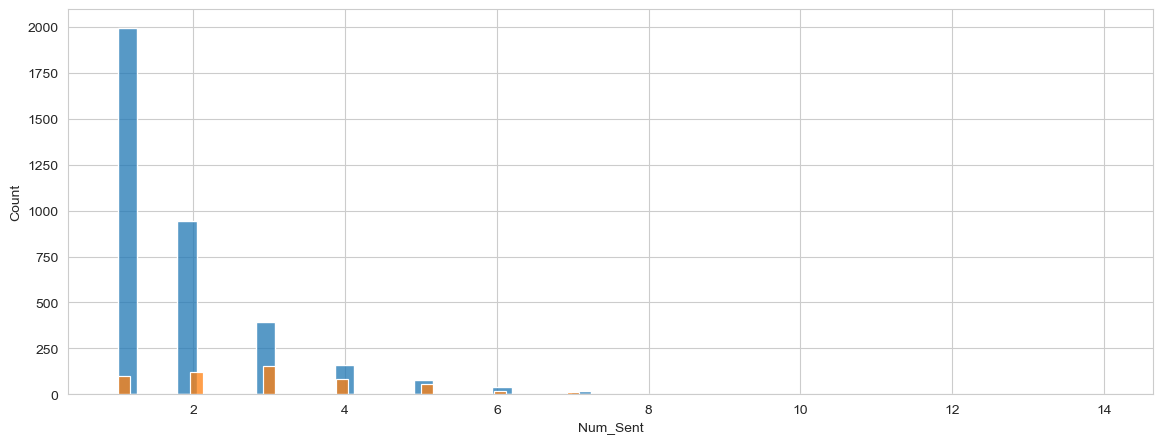

In [26]:
## comparing the ham and spam data regarding num of sentence
plt.subplots(figsize = (14,5))
sns.histplot(ham_data['Num_Sent'],bins = 50)
sns.histplot(spam_data['Num_Sent'] , bins = 50)
plt.show('Comapring Number Of Sentens Spam Vs Ham')


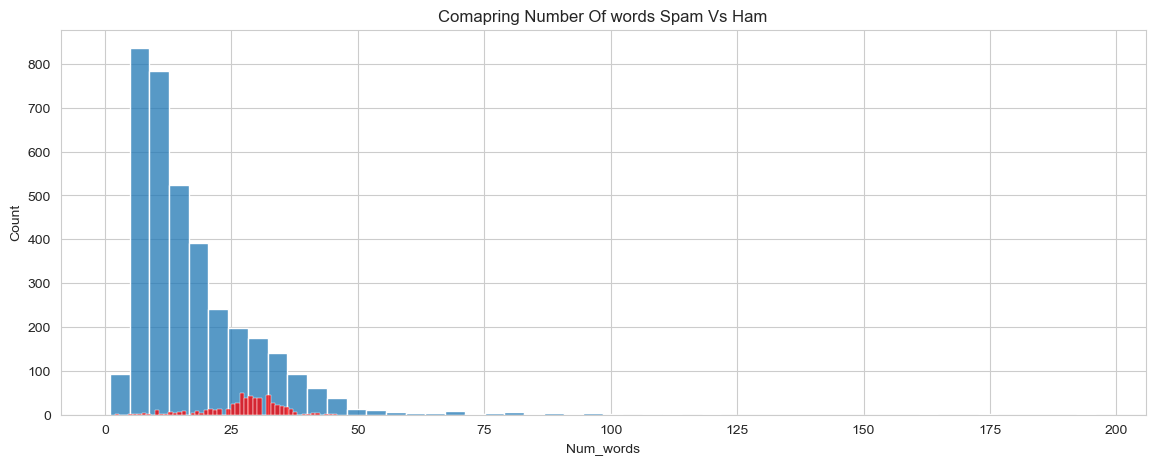

In [27]:
## comparing the ham and spam data regarding num of Words
plt.subplots(figsize = (14,5))
sns.histplot(ham_data['Num_words'],bins = 50)
sns.histplot(spam_data['Num_words'] , bins = 50 , color  = 'red')
plt.title('Comapring Number Of words Spam Vs Ham')
plt.show()


### Conclusion 
* The Number Of Words And sentence In Ham Message More Greater Than In Spam Message

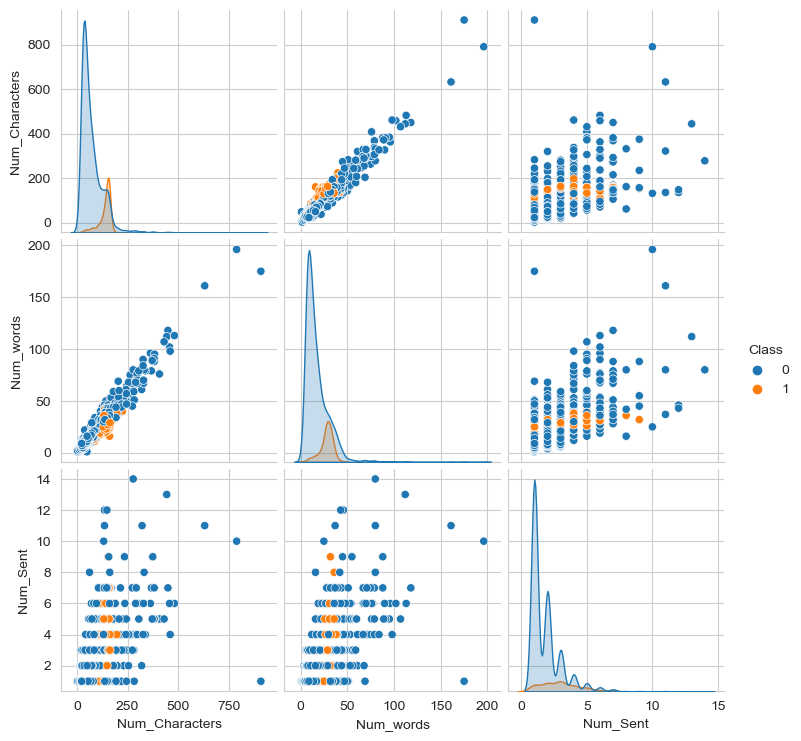

In [28]:
## Checking for relationship Between features and target
sns.pairplot(train_data , hue='Class')
plt.show()

### Text Pre-processing 
_____________
1. lower Case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words 
5. Stemming 

In [29]:
import re
text_train = train_data['Text']

text_test = test_data['Text']

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmtizer = WordNetLemmatizer()

In [31]:
corpus=[]
for i in range(len(text_train)):
    text = re.sub('[^a-zA-Z]' , " " , text_train[i]) ## to remoce any number and special characters
    text = text.lower() ## to make all word in lower case
    text = text.split() ## to split sentence to word
    
    ## remove unimportant words and return the word to its root
    text = [lemmtizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [32]:
## remove unimportant columns and add text after pre-processing
train_data = pd.concat([pd.Series(corpus), train_data] , axis = 1).drop(columns = ['Text'] , axis = 1)

In [33]:
train_data.head()

,0,Class,Num_Characters,Num_words,Num_Sent
0,yeah stand close tho catch something,0,62,12,2
1,sleeping nt feeling well,0,24,4,1
2,come aftr lt decimal gt cleaning house,0,55,16,1
3,almost see u sec,0,28,8,1
4,yeah probably earlier,0,32,6,1


In [34]:
corpus1 =[]
for i in range(len(text_test)):
    ## remove all numbers and special characters 
    text = re.sub('[^a-zA-Z]' , ' ' , text_test[i])
    
    ## make all word in lower case
    text = text.lower()
    
    ## Spliting each word 
    text = text.split()
    
    ## remove unimportant word and return each word to its root 
    text = [lemmtizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    
    text = " ".join(text)
    corpus1.append(text)

In [35]:
## remove unimportant columns and add text after pre-processing
test_data = pd.concat([pd.Series(corpus1), test_data] , axis = 1).drop(columns = ['Text'] , axis = 1)

In [36]:
test_data.head()

,0,Class,Num_Characters,Num_words,Num_Sent
0,convey regard,0,24,5,1
1,anyway many good evening u,0,40,12,2
2,sort code acc bank natwest reply confirm sent ...,0,114,28,3
3,sorry din lock keypad,0,27,7,1
4,hi babe chloe r u smashed saturday night great...,1,160,37,5


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [38]:
## Visualizing The words in spam emails
spam_wc = wc.generate(train_data[train_data['Class'] == 1][0].str.cat(sep = ' '))

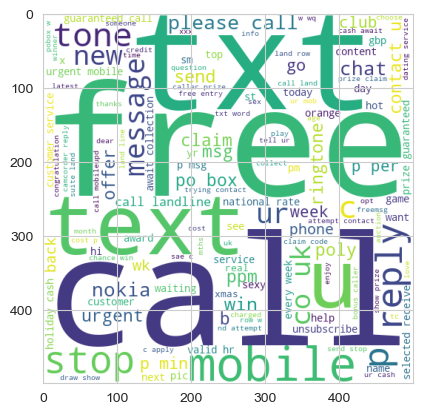

In [39]:
## plotting
plt.imshow(spam_wc)
plt.show()

In [40]:
## Visualizing The words in spam emails
ham_wc = wc.generate(train_data[train_data['Class'] == 0][0].str.cat(sep = ' '))

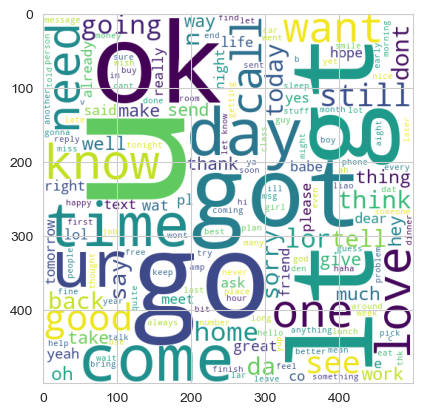

In [41]:
## plotting
plt.imshow(ham_wc)
plt.show()

In [42]:
## Most Repeated Words in Spam mails 
spam_corpus = []
for msg in train_data[train_data['Class'] == 1][0].tolist():
    for word in msg.split():
        spam_corpus.append(word)

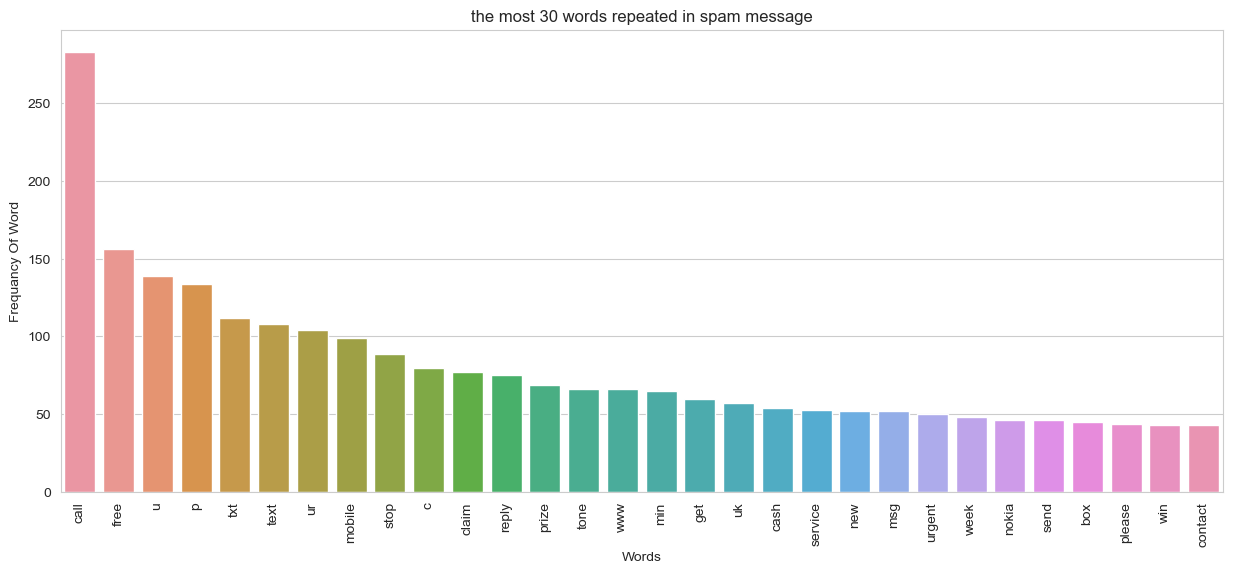

In [43]:
from collections import Counter
## Ploting The most 30 words repeated in spam message
plt.figure(figsize=(15,6))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.ylabel('Frequancy Of Word')
plt.xlabel('Words')
plt.title('the most 30 words repeated in spam message')
plt.xticks(rotation = 'vertical')
plt.show()

In [44]:
## Most Repeated Words In Ham Message
ham_words = []
for msg in train_data[train_data['Class'] == 0][0].tolist():
    for word in msg.split():
        ham_words.append(word)

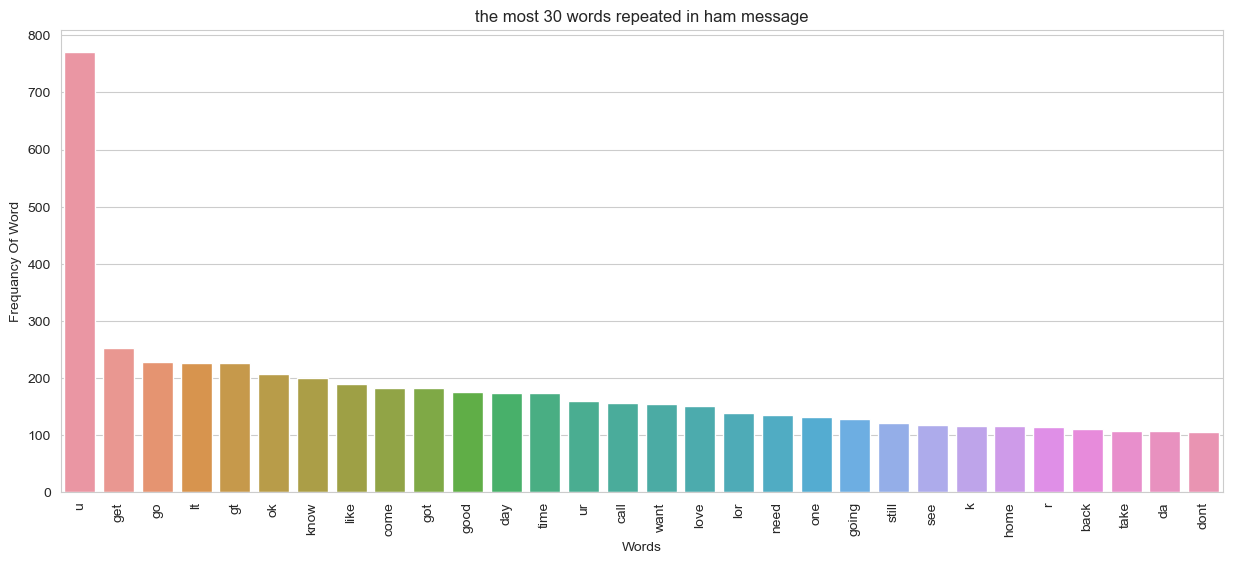

In [45]:
## plotting the most 30 words repeated in ham message
plt.figure(figsize=(15,6))
sns.barplot(x = pd.DataFrame(Counter(ham_words).most_common(30))[0],y = pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.ylabel('Frequancy Of Word')
plt.xlabel('Words')
plt.title('the most 30 words repeated in ham message')
plt.show()

### Features Selection
______________

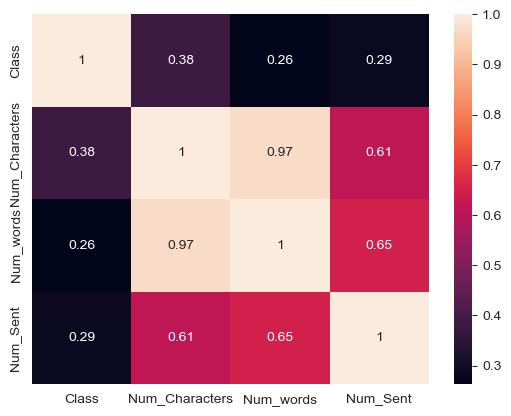

In [46]:
## Checking for correlation between features
sns.heatmap(train_data.corr(numeric_only = True) , annot = True )
plt.show()

#### To Avoide the Multicollinearity We Remove Num_sent And Num_words Because They are High Related To Num_Characters And Let The Num_Chara Because the Most Related to Class

In [47]:
## droping most related features to num_characters 
train_data.drop(columns = ['Num_Sent' , 'Num_words'] , inplace=True)

test_data.drop(columns = ['Num_Sent' , 'Num_words'] , inplace=True)

In [48]:
test_data.head()

,0,Class,Num_Characters
0,convey regard,0,24
1,anyway many good evening u,0,40
2,sort code acc bank natwest reply confirm sent ...,0,114
3,sorry din lock keypad,0,27
4,hi babe chloe r u smashed saturday night great...,1,160


In [49]:
## Converting the text into numerical Data 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()

In [50]:
## fit and transform X_train 
X_train = vectorize.fit_transform(train_data[0]).toarray()

y_train = train_data['Class']

## transform only X_test
X_test = vectorize.transform(test_data[0]).toarray()

y_test = test_data['Class']



### Build The Model

In [51]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score , accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm
import sklearn

### Hyper-parameters Optimization

In [52]:
import optuna

In [55]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators' , 200 , 3000 ,20)
    
    max_depth = int(trial.suggest_int('max_depth', 1,10,1))
    
    num_leaves = trial.suggest_int('num_leaves' , 20 , 110 , 5)
    
    learning_rate = trial.suggest_float('learning_rate' , 0.001 , 0.1)
    
    boosting_type = trial.suggest_categorical('boosting_type' ,['gbdt' , 'dart'])
    
    colsample_bytree = trial.suggest_float('colsample_bytree' , 0.50 , 0.90)
        
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf' , 1,20,2)
    
    clas = lightgbm.LGBMClassifier(
                            n_estimators = n_estimators ,
                            max_depth = max_depth ,
                            num_leaves = num_leaves ,
                            learning_rate = learning_rate ,
                            boosting_type = boosting_type , 
                            colsample_bytree = colsample_bytree,
                            min_data_in_leaf = min_data_in_leaf  )
    
    return sklearn.model_selection.cross_val_score(clas , X_train , y_train , cv = 5 , scoring='accuracy' , n_jobs=-1).mean()

    


In [56]:
study  = optuna.create_study(direction='maximize')
study.optimize(objective , n_trials=50)

[I 2024-05-21 05:34:56,145] A new study created in memory with name: no-name-f5e5ebce-76e3-4411-acf4-0f935da27b93
[I 2024-05-21 05:35:12,486] Trial 0 finished with value: 0.9711663545036607 and parameters: {'n_estimators': 1160, 'max_depth': 4, 'num_leaves': 55, 'learning_rate': 0.044859125964949294, 'boosting_type': 'dart', 'colsample_bytree': 0.8348085374168231, 'min_data_in_leaf': 5}. Best is trial 0 with value: 0.9711663545036607.
[I 2024-05-21 05:35:16,796] Trial 1 finished with value: 0.9709268403428117 and parameters: {'n_estimators': 820, 'max_depth': 1, 'num_leaves': 80, 'learning_rate': 0.06976502113909845, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8758191132465923, 'min_data_in_leaf': 15}. Best is trial 0 with value: 0.9711663545036607.
[I 2024-05-21 05:35:29,329] Trial 2 finished with value: 0.9678290481866167 and parameters: {'n_estimators': 700, 'max_depth': 6, 'num_leaves': 110, 'learning_rate': 0.025797502654526107, 'boosting_type': 'dart', 'colsample_bytree': 0.69

[I 2024-05-21 05:45:38,846] Trial 25 finished with value: 0.9749804188659971 and parameters: {'n_estimators': 2160, 'max_depth': 7, 'num_leaves': 95, 'learning_rate': 0.08716138712162119, 'boosting_type': 'gbdt', 'colsample_bytree': 0.6008534416843286, 'min_data_in_leaf': 3}. Best is trial 23 with value: 0.9780787785912934.
[I 2024-05-21 05:46:14,821] Trial 26 finished with value: 0.9771246949316079 and parameters: {'n_estimators': 1220, 'max_depth': 8, 'num_leaves': 90, 'learning_rate': 0.08817606040145884, 'boosting_type': 'gbdt', 'colsample_bytree': 0.7221762492165139, 'min_data_in_leaf': 3}. Best is trial 23 with value: 0.9780787785912934.
[I 2024-05-21 05:46:43,960] Trial 27 finished with value: 0.9745028094670525 and parameters: {'n_estimators': 1680, 'max_depth': 9, 'num_leaves': 90, 'learning_rate': 0.08848795638179312, 'boosting_type': 'gbdt', 'colsample_bytree': 0.7471571698271706, 'min_data_in_leaf': 3}. Best is trial 23 with value: 0.9780787785912934.
[I 2024-05-21 05:47:08

In [57]:
trial = study.best_trial

print(f"Accuracy : {trial.value}")
 
print(f"Best HyperParameters : {trial.params}")

Accuracy : 0.9780787785912934
Best HyperParameters : {'n_estimators': 1980, 'max_depth': 4, 'num_leaves': 80, 'learning_rate': 0.08789900101988753, 'boosting_type': 'gbdt', 'colsample_bytree': 0.6050029263884635, 'min_data_in_leaf': 3}


In [58]:
model_gbm = LGBMClassifier(  n_estimators = trial.params['n_estimators'] ,
                             max_depth = trial.params['max_depth'] ,
                             num_leaves = trial.params['num_leaves'] ,
                             learning_rate = trial.params['learning_rate'] ,
                             boosting_type =  trial.params['boosting_type'],
                             colsample_bytree =trial.params['colsample_bytree'] ,
                             min_data_in_leaf =trial.params['min_data_in_leaf']  )

In [59]:
## fitting the model to train data
model_gbm.fit(X_train , y_train)

## making prediction
pred = model_gbm.predict(X_test)



[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 547, number of negative: 3649
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11845
[LightGBM] [Info] Number of data points in the train set: 4196, number of used features: 1941
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.130362 -> initscore=-1.897760
[LightGBM] [Info] Start training from score -1.897760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [60]:
## measure the accuracy and overfitting
print(f"Accuracy On Train Data : {model_gbm.score(X_train , y_train)}")
print(f"Accuracy On Test Data : {model_gbm.score(X_test , y_test)}")
print(f"confusion_matrix \n: {confusion_matrix(y_test , pred)}")
print(f"precision_score : {precision_score(y_test , pred)}")
print(f"recall_score : {recall_score(y_test , pred)}")
print(f"f1_score : {f1_score(y_test , pred)}")

[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
Accuracy On Train Data : 0.9997616777883699
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
Accuracy On Test Data : 0.9871323529411765
confusion_matrix 
: [[948   4]
 [ 10 126]]
precision_score : 0.9692307692307692
recall_score : 0.9264705882352942
f1_score : 0.9473684210526315


In [61]:
import pickle

In [63]:
filename = 'model_gbm.sav'
pickle.dump(model_gbm, open(filename, 'wb'))